In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
import os

In [2]:
data = pd.read_csv('data/Санкт-Петербург/DATTSVT.csv',index_col=False,sep='\t')

<ipython-input-2-42092d7f73d8>:1: DtypeWarning: Columns (3,7) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('data/Санкт-Петербург/DATTSVT.csv',index_col=False,sep='\t')


In [3]:
data

,napr,period,nastranapr,tnved,edizm,Stoim,Netto,Kol,Region,Region_s
0,ЭК,07/2021,AM,3506910000,NaN,"66,53",162,0,40000 - ГОРОД САНКТ-ПЕТЕРБУРГ ГОРОД ФЕДЕРАЛЬНО...,02-СЕВЕРО-ЗАПАДНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
1,ЭК,09/2021,BG,3506910000,NaN,"89,7","0,4",0,40000 - ГОРОД САНКТ-ПЕТЕРБУРГ ГОРОД ФЕДЕРАЛЬНО...,02-СЕВЕРО-ЗАПАДНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
2,ИМ,01/2021,BY,3506910000,NaN,"240,87","2,36",0,40000 - ГОРОД САНКТ-ПЕТЕРБУРГ ГОРОД ФЕДЕРАЛЬНО...,02-СЕВЕРО-ЗАПАДНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
3,ИМ,02/2021,BY,3506910000,NaN,"1509,18","742,52",0,40000 - ГОРОД САНКТ-ПЕТЕРБУРГ ГОРОД ФЕДЕРАЛЬНО...,02-СЕВЕРО-ЗАПАДНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
4,ЭК,02/2021,BY,3506910000,NaN,"487,48","116,02",0,40000 - ГОРОД САНКТ-ПЕТЕРБУРГ ГОРОД ФЕДЕРАЛЬНО...,02-СЕВЕРО-ЗАПАДНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
...,...,...,...,...,...,...,...,...,...,...
458954,ИМ,04/2021,US,8414594000,796.0,"889,72","19,71",6,40000 - ГОРОД САНКТ-ПЕТЕРБУРГ ГОРОД ФЕДЕРАЛЬНО...,02-СЕВЕРО-ЗАПАДНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
458955,ИМ,09/2021,US,8414108900,796.0,"2378,34","2,52",6,40000 - ГОРОД САНКТ-ПЕТЕРБУРГ ГОРОД ФЕДЕРАЛЬНО...,02-СЕВЕРО-ЗАПАДНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
458956,ЭК,05/2021,UZ,8414108900,796.0,2416,46,1,40000 - ГОРОД САНКТ-ПЕТЕРБУРГ ГОРОД ФЕДЕРАЛЬНО...,02-СЕВЕРО-ЗАПАДНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
458957,ИМ,01/2021,CN,8414202000,796.0,"32352,98","6692,88",41195,40000 - ГОРОД САНКТ-ПЕТЕРБУРГ ГОРОД ФЕДЕРАЛЬНО...,02-СЕВЕРО-ЗАПАДНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ


In [4]:
pd.DataFrame(data['napr'].value_counts())

,napr
ИМ,318489
ЭК,140470


In [5]:
pd.DataFrame(data['tnved'].value_counts())

,tnved
3926909709,1033
4016930005,792
7326909807,770
8708299009,647
8421990008,647
...,...
5509210000,1
4114101000,1
5405000000,1
2517410000,1


In [6]:
data = data.drop(['Region','Region_s'],axis=1)[data['nastranapr'].notna()]

<AxesSubplot:ylabel='nastranapr'>

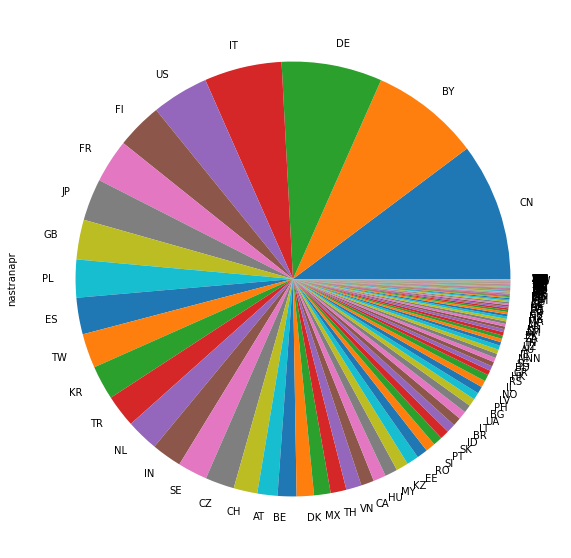

In [7]:
data.loc[data['napr'] == 'ИМ']['nastranapr'].value_counts().plot.pie(y='count', figsize=(10, 10))

In [8]:
(pd.DataFrame(data.loc[data['napr'] == 'ИМ']['nastranapr'].value_counts()))

,nastranapr
CN,32605
BY,25886
DE,23804
IT,18358
US,13469
...,...
BS,1
VI,1
KW,1
SN,1


In [9]:
un_countries = pd.unique(data.loc[data['napr'] == 'ИМ']['nastranapr'])

In [12]:
un_countries

array(['BY', 'GB', 'IN', 'JP', 'CA', 'DE', 'CH', 'CN', 'CZ', 'FR', 'AT',
       'SE', 'ID', 'US', 'IT', 'FI', 'ES', 'HU', 'IL', 'KZ', 'NL', 'BE',
       'LT', 'TR', 'PL', 'KR', 'MY', 'EE', 'GR', 'NG', 'TH', 'UA', 'LV',
       'DK', 'AU', 'IE', 'AR', 'VN', 'SI', 'TW', 'EU', 'PT', 'NO', 'SM',
       'LB', 'BR', 'SG', 'HR', 'LK', 'MX', 'EG', 'RO', 'OM', 'AE', 'SK',
       'NNN', 'RS', 'MC', 'PE', 'ZA', 'BG', 'SA', 'MG', 'LU', 'PH', 'CR',
       'HK', 'KG', 'NZ', 'BA', 'CI', 'SO', 'CL', 'UY', 'PY', 'AM', 'FO',
       'MA', 'BO', 'EC', 'GL', 'BD', 'MR', 'MU', 'CO', 'UZ', 'MD', 'GE',
       'KE', 'PK', 'MK', 'MW', 'MZ', 'TM', 'AZ', 'TZ', 'ZM', 'ZW', 'DO',
       'TN', 'AB', 'GT', 'NP', 'GH', 'ET', 'NI', 'SZ', 'IS', 'KH', 'DZ',
       'HN', 'PG', 'SV', 'TJ', 'UG', 'SD', 'RW', 'MT', 'BH', 'MM', 'ER',
       'LI', 'AL', 'CY', 'JO', 'ME', 'LA', 'HT', 'CM', 'MN', 'AD', 'VI',
       'SL', 'ML', 'MO', 'BB', 'FK', 'TD', 'PA', 'NE', 'QA', 'MQ', 'PR',
       'TK', 'LS', 'BM', 'DM', 'CC', 'GA', 'KP', '

In [13]:
dict_of_cn_st = {}

In [14]:
for c in un_countries:
    dict_of_cn_st[c] = np.round(data['Stoim'].str.replace(',', '.').astype(float)[(data.nastranapr == c)].sum(),3)

In [15]:
dict_of_cn_st = {k: v for k, v in sorted(dict_of_cn_st.items(), key=lambda item: item[1])}

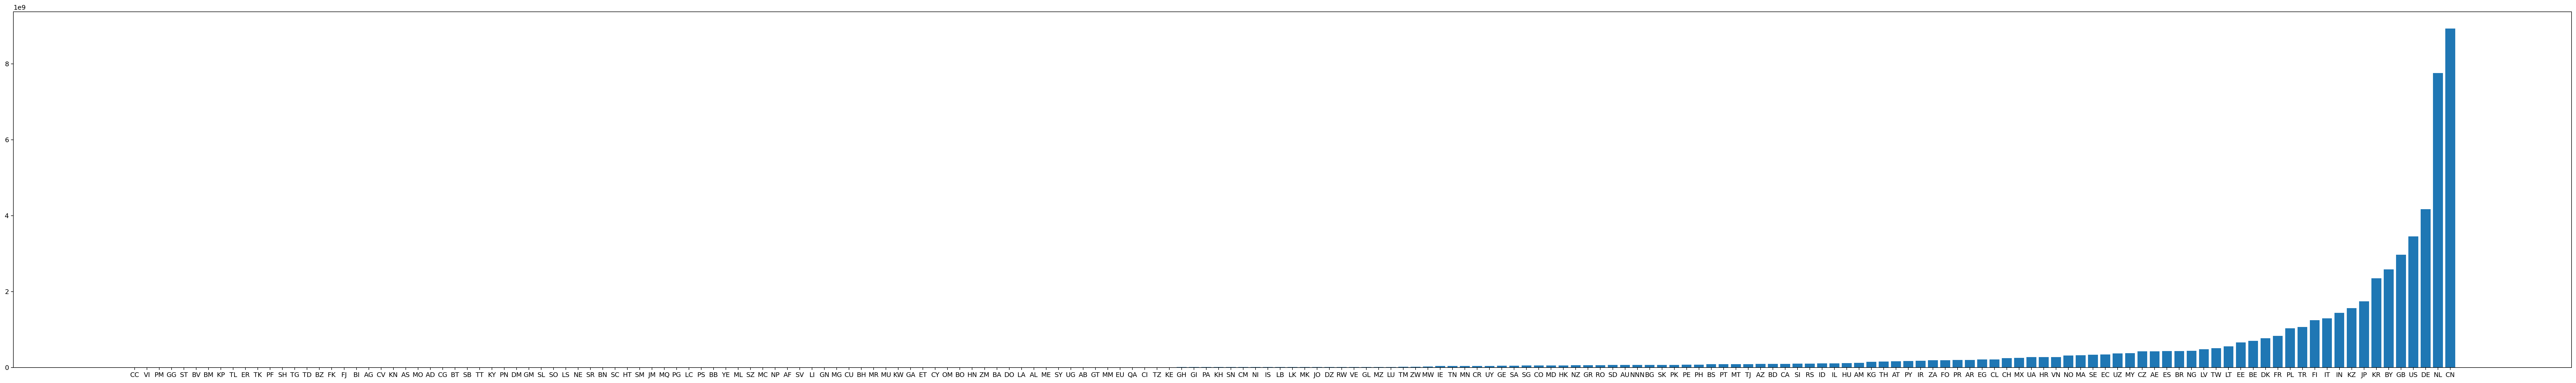

In [16]:
plt.figure(figsize=(70, 10), dpi=180)
plt.bar(list(dict_of_cn_st.keys()), dict_of_cn_st.values())
plt.show()

In [17]:
data.loc[data['napr'] == 'ИМ']['nastranapr'].hist(xrot=90, figsize=(20,10),grid=False,bins=len(data.loc[data['napr'] == 'ИМ']['nastranapr'].unique()),ax=()'dfd')

SyntaxError: invalid syntax (<ipython-input-17-eb46bce60e7c>, line 1)

# Alsu     Data Preporation

In [10]:
dirpath = './data'
file_list = os.listdir(dirpath)

In [11]:
df = pd.DataFrame()
for filename in os.listdir(dirpath):
    filepath = os.path.join(dirpath, filename, 'DATTSVT.csv')
    data_new = pd.read_csv(filepath, sep='\t')
    
    df = pd.concat([df, data_new])
        
df

<ipython-input-11-345f7e928bda>:4: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  data_new = pd.read_csv(filepath, sep='\t')
<ipython-input-11-345f7e928bda>:4: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  data_new = pd.read_csv(filepath, sep='\t')
<ipython-input-11-345f7e928bda>:4: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  data_new = pd.read_csv(filepath, sep='\t')
<ipython-input-11-345f7e928bda>:4: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  data_new = pd.read_csv(filepath, sep='\t')
<ipython-input-11-345f7e928bda>:4: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  data_new = pd.read_csv(filepath, sep='\t')
<ipython-input-11-345f7e928bda>:4: DtypeWarning: Columns (3) have mixed types. Specify dtype option 

,napr,period,nastranapr,tnved,edizm,Stoim,Netto,Kol,Region,Region_s
0,ИМ,05/2021,IN,3507909000,NaN,"3414,01",50,0,01000 - АЛТАЙСКИЙ КРАЙ,06-СИБИРСКИЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
1,ЭК,02/2021,KZ,3808911000,NaN,"4020,47","741,809",0,01000 - АЛТАЙСКИЙ КРАЙ,06-СИБИРСКИЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
2,ЭК,04/2021,KZ,3808932700,NaN,73875,"8249,727",0,01000 - АЛТАЙСКИЙ КРАЙ,06-СИБИРСКИЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
3,ЭК,09/2021,KZ,3808932700,NaN,"14184,26","2023,609",0,01000 - АЛТАЙСКИЙ КРАЙ,06-СИБИРСКИЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
4,ЭК,12/2021,KZ,3808932700,NaN,"92,32","3,545",0,01000 - АЛТАЙСКИЙ КРАЙ,06-СИБИРСКИЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
...,...,...,...,...,...,...,...,...,...,...
46154,ИМ,05/2021,FR,8413504000,796.0,"10796,97","38,5",11,78000 - ЯРОСЛАВСКАЯ ОБЛАСТЬ,01-ЦЕНТРАЛЬНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
46155,ЭК,11/2021,DE,8413302008,NaN,"170,05","0,6",0,78000 - ЯРОСЛАВСКАЯ ОБЛАСТЬ,01-ЦЕНТРАЛЬНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
46156,ИМ,08/2021,IT,8413308008,796.0,"176450,87","11642,04",4030,78000 - ЯРОСЛАВСКАЯ ОБЛАСТЬ,01-ЦЕНТРАЛЬНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
46157,ЭК,07/2021,KZ,8413910008,NaN,"314,81","7,2",0,78000 - ЯРОСЛАВСКАЯ ОБЛАСТЬ,01-ЦЕНТРАЛЬНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ


In [12]:
df = df.reset_index(drop=True)
df

,napr,period,nastranapr,tnved,edizm,Stoim,Netto,Kol,Region,Region_s
0,ИМ,05/2021,IN,3507909000,NaN,"3414,01",50,0,01000 - АЛТАЙСКИЙ КРАЙ,06-СИБИРСКИЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
1,ЭК,02/2021,KZ,3808911000,NaN,"4020,47","741,809",0,01000 - АЛТАЙСКИЙ КРАЙ,06-СИБИРСКИЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
2,ЭК,04/2021,KZ,3808932700,NaN,73875,"8249,727",0,01000 - АЛТАЙСКИЙ КРАЙ,06-СИБИРСКИЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
3,ЭК,09/2021,KZ,3808932700,NaN,"14184,26","2023,609",0,01000 - АЛТАЙСКИЙ КРАЙ,06-СИБИРСКИЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
4,ЭК,12/2021,KZ,3808932700,NaN,"92,32","3,545",0,01000 - АЛТАЙСКИЙ КРАЙ,06-СИБИРСКИЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
...,...,...,...,...,...,...,...,...,...,...
4913021,ИМ,05/2021,FR,8413504000,796.0,"10796,97","38,5",11,78000 - ЯРОСЛАВСКАЯ ОБЛАСТЬ,01-ЦЕНТРАЛЬНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
4913022,ЭК,11/2021,DE,8413302008,NaN,"170,05","0,6",0,78000 - ЯРОСЛАВСКАЯ ОБЛАСТЬ,01-ЦЕНТРАЛЬНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
4913023,ИМ,08/2021,IT,8413308008,796.0,"176450,87","11642,04",4030,78000 - ЯРОСЛАВСКАЯ ОБЛАСТЬ,01-ЦЕНТРАЛЬНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
4913024,ЭК,07/2021,KZ,8413910008,NaN,"314,81","7,2",0,78000 - ЯРОСЛАВСКАЯ ОБЛАСТЬ,01-ЦЕНТРАЛЬНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ


In [13]:
df.describe()

,edizm
count,1.609125e+06
mean,7.146864e+02
std,2.237820e+02
min,6.000000e+00
25%,7.960000e+02
50%,7.960000e+02
75%,7.960000e+02
max,8.650000e+02


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4913026 entries, 0 to 4913025
Data columns (total 10 columns):
 #   Column      Dtype  
---  ------      -----  
 0   napr        object 
 1   period      object 
 2   nastranapr  object 
 3   tnved       object 
 4   edizm       float64
 5   Stoim       object 
 6   Netto       object 
 7   Kol         object 
 8   Region      object 
 9   Region_s    object 
dtypes: float64(1), object(9)
memory usage: 374.8+ MB


Переведем колличественные характеристики в колонки с подходящим типом данных (числовым)

In [15]:
df['Stoim'] = df['Stoim'].apply(lambda x: float(x.replace(',', '.')))
type(df.Stoim[0])

numpy.float64

In [16]:
df['Netto'] = df['Netto'].apply(lambda x: float(x.replace(',', '.')))
type(df.Netto[0])

numpy.float64

In [17]:
df['Kol'] = df['Kol'].apply(lambda x: float(x.replace(',', '.')) if type(x) == str else float(x))
type(df.Kol[0])

numpy.float64

In [18]:
cols = df.columns
for col in cols:
    print(f"Характеристика: {col}")
    print(f"Количество уникальных значений: {df[col].nunique()}")
#     print(f"Список значений: {df[col]}")
#     print(df[col])
    print('///////////////////////////////////////////////////')

Характеристика: napr
Количество уникальных значений: 2
///////////////////////////////////////////////////
Характеристика: period
Количество уникальных значений: 12
///////////////////////////////////////////////////
Характеристика: nastranapr
Количество уникальных значений: 244
///////////////////////////////////////////////////
Характеристика: tnved
Количество уникальных значений: 20351
///////////////////////////////////////////////////
Характеристика: edizm
Количество уникальных значений: 21
///////////////////////////////////////////////////
Характеристика: Stoim
Количество уникальных значений: 2240610
///////////////////////////////////////////////////
Характеристика: Netto
Количество уникальных значений: 1328508
///////////////////////////////////////////////////
Характеристика: Kol
Количество уникальных значений: 181513
///////////////////////////////////////////////////
Характеристика: Region
Количество уникальных значений: 85
//////////////////////////////////////////////////

## Data Cleaning

In [19]:
print('Размер выбоpки: {}, {}'.format(df.shape[0], df.shape[1]))

Размер выбоpки: 4913026, 10


Исследуем датасет на наличие пропусков

In [20]:
df.isna().sum()

napr                0
period              0
nastranapr        239
tnved               0
edizm         3303901
Stoim               0
Netto               0
Kol                 0
Region              0
Region_s            0
dtype: int64

In [21]:
df.edizm

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
           ...  
4913021    796.0
4913022      NaN
4913023    796.0
4913024      NaN
4913025    796.0
Name: edizm, Length: 4913026, dtype: float64

In [22]:
df[df.edizm.isna() == True]

,napr,period,nastranapr,tnved,edizm,Stoim,Netto,Kol,Region,Region_s
0,ИМ,05/2021,IN,3507909000,NaN,3414.01,50.000,0.0,01000 - АЛТАЙСКИЙ КРАЙ,06-СИБИРСКИЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
1,ЭК,02/2021,KZ,3808911000,NaN,4020.47,741.809,0.0,01000 - АЛТАЙСКИЙ КРАЙ,06-СИБИРСКИЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
2,ЭК,04/2021,KZ,3808932700,NaN,73875.00,8249.727,0.0,01000 - АЛТАЙСКИЙ КРАЙ,06-СИБИРСКИЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
3,ЭК,09/2021,KZ,3808932700,NaN,14184.26,2023.609,0.0,01000 - АЛТАЙСКИЙ КРАЙ,06-СИБИРСКИЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
4,ЭК,12/2021,KZ,3808932700,NaN,92.32,3.545,0.0,01000 - АЛТАЙСКИЙ КРАЙ,06-СИБИРСКИЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
...,...,...,...,...,...,...,...,...,...,...
4913011,ЭК,12/2021,BY,8432900000,NaN,464.37,50.000,0.0,78000 - ЯРОСЛАВСКАЯ ОБЛАСТЬ,01-ЦЕНТРАЛЬНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
4913012,ИМ,10/2021,IN,8431498009,NaN,2789.72,275.000,0.0,78000 - ЯРОСЛАВСКАЯ ОБЛАСТЬ,01-ЦЕНТРАЛЬНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
4913018,ИМ,12/2021,DE,8412908009,NaN,1537.22,72.000,0.0,78000 - ЯРОСЛАВСКАЯ ОБЛАСТЬ,01-ЦЕНТРАЛЬНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
4913022,ЭК,11/2021,DE,8413302008,NaN,170.05,0.600,0.0,78000 - ЯРОСЛАВСКАЯ ОБЛАСТЬ,01-ЦЕНТРАЛЬНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ


Построим на матрицу заполненности датасета

<AxesSubplot:>

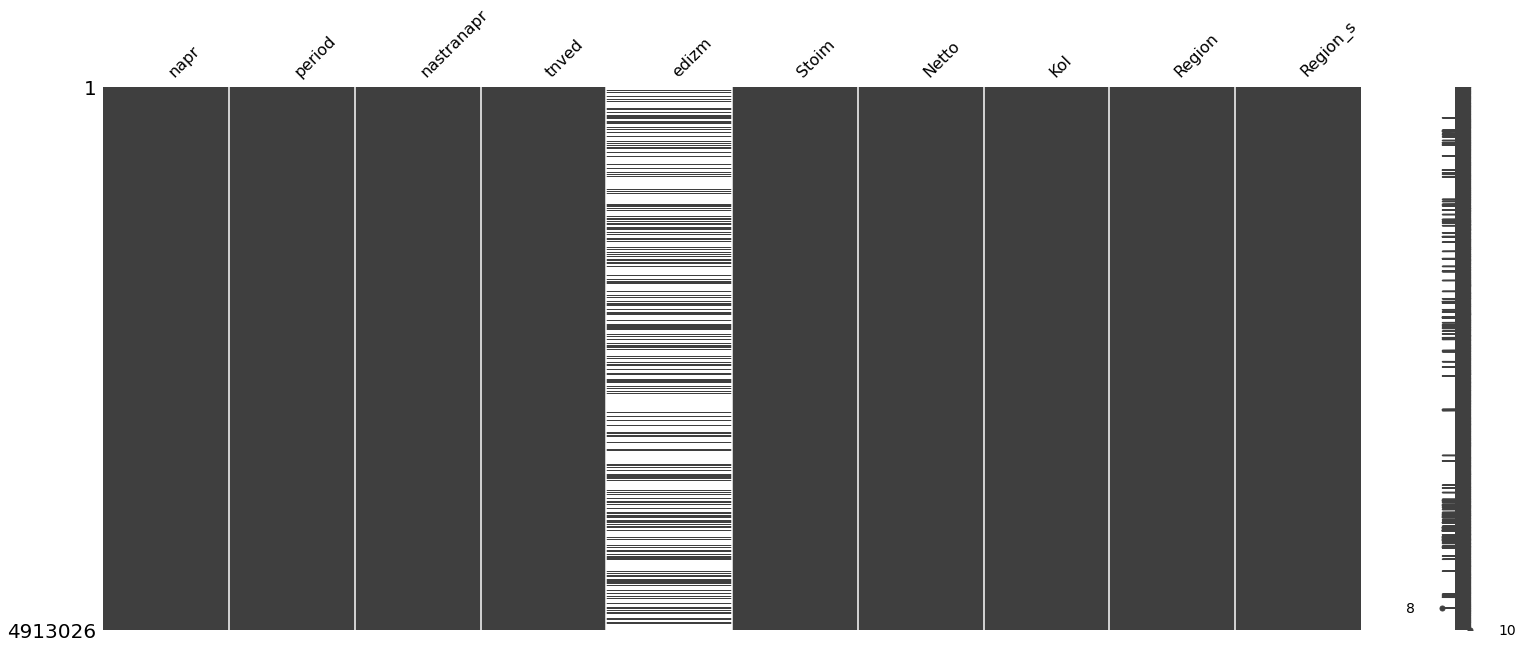

In [23]:
msno.matrix(df)

<AxesSubplot:>

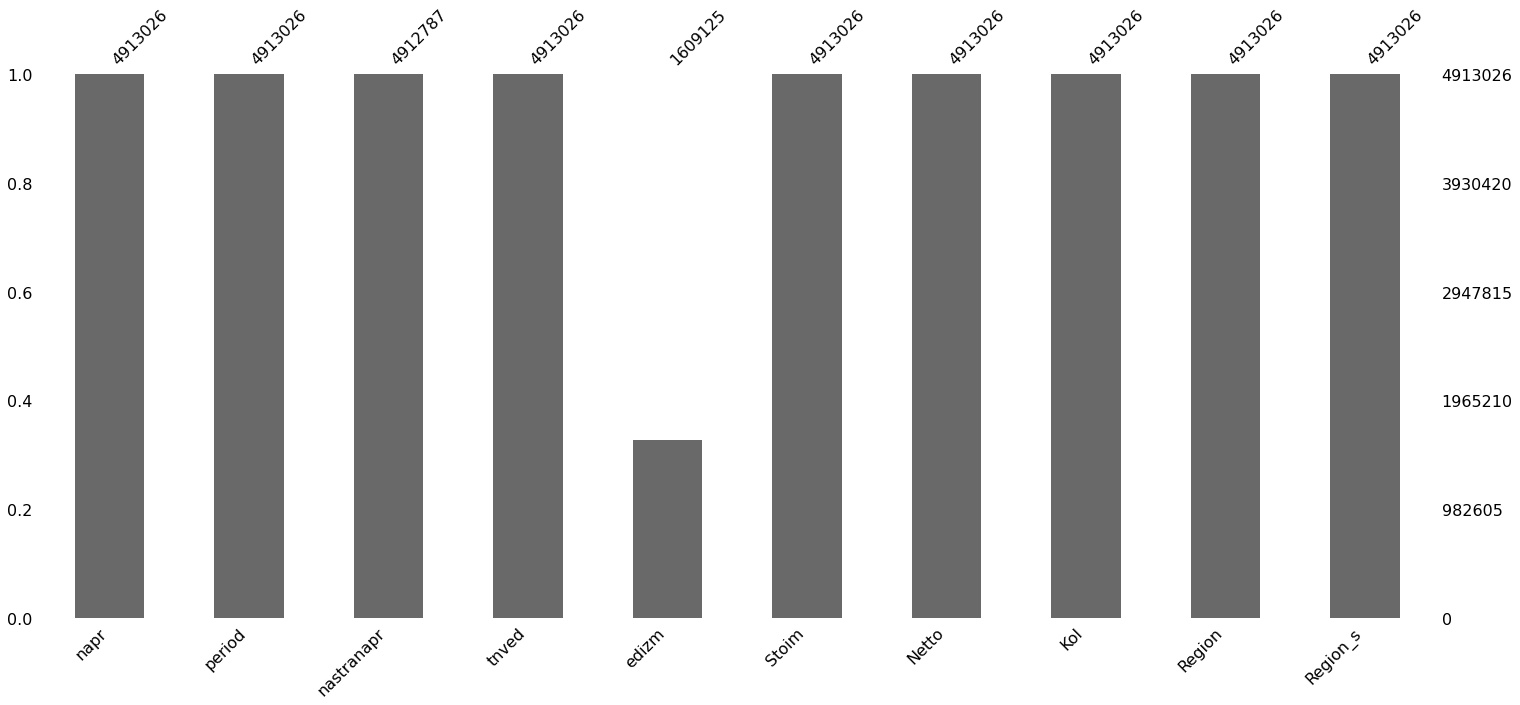

In [24]:
msno.bar(df)

Удаляем колонку "edizm" тк она имеет большое кол-во пропусков, что ухудшит результат исследования

In [25]:
df = df.drop('edizm', axis=1)
df = df

### nastranapr

Посмотрим внимательнее на пропуски в колонке "nastranapr"

In [26]:
df[df.nastranapr.isna() == True]

,napr,period,nastranapr,tnved,Stoim,Netto,Kol,Region,Region_s
281223,ИМ,09/2021,NaN,9705000000,7533.00,80.00,0.0,20000 - ВОРОНЕЖСКАЯ ОБЛАСТЬ,01-ЦЕНТРАЛЬНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
393763,ЭК,02/2021,NaN,8205598099,42.34,0.42,0.0,27000 - КАЛИНИНГРАДСКАЯ ОБЛАСТЬ,02-СЕВЕРО-ЗАПАДНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
399704,ЭК,02/2021,NaN,8536699008,1945.08,2.40,0.0,27000 - КАЛИНИНГРАДСКАЯ ОБЛАСТЬ,02-СЕВЕРО-ЗАПАДНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
402674,ЭК,09/2021,NaN,3920102800,53933.82,21600.00,0.0,27000 - КАЛИНИНГРАДСКАЯ ОБЛАСТЬ,02-СЕВЕРО-ЗАПАДНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
407517,ЭК,09/2021,NaN,9014900000,4209.49,7.30,0.0,27000 - КАЛИНИНГРАДСКАЯ ОБЛАСТЬ,02-СЕВЕРО-ЗАПАДНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
...,...,...,...,...,...,...,...,...,...
4597684,ЭК,06/2021,NaN,6305329000,112.46,45.50,0.0,70000 - ТУЛЬСКАЯ ОБЛАСТЬ,01-ЦЕНТРАЛЬНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
4606899,ЭК,06/2021,NaN,3102309000,307687.39,1304500.00,444740.0,70000 - ТУЛЬСКАЯ ОБЛАСТЬ,01-ЦЕНТРАЛЬНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
4610784,ЭК,09/2021,NaN,6305329000,82.77,35.00,0.0,70000 - ТУЛЬСКАЯ ОБЛАСТЬ,01-ЦЕНТРАЛЬНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
4614421,ЭК,04/2021,NaN,6305329000,158.88,63.00,0.0,70000 - ТУЛЬСКАЯ ОБЛАСТЬ,01-ЦЕНТРАЛЬНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ


In [27]:
nastranapr_nan = df[df.nastranapr.isna() == True]


In [28]:
nastranapr_nan[nastranapr_nan.napr == 'ИМ']

,napr,period,nastranapr,tnved,Stoim,Netto,Kol,Region,Region_s
281223,ИМ,09/2021,NaN,9705000000,7533.00,80.000,0.0,20000 - ВОРОНЕЖСКАЯ ОБЛАСТЬ,01-ЦЕНТРАЛЬНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
427450,ИМ,12/2021,NaN,806101000,16021.82,4677.000,0.0,27000 - КАЛИНИНГРАДСКАЯ ОБЛАСТЬ,02-СЕВЕРО-ЗАПАДНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
526837,ИМ,06/2021,NaN,9031908500,4.33,0.004,0.0,27000 - КАЛИНИНГРАДСКАЯ ОБЛАСТЬ,02-СЕВЕРО-ЗАПАДНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
625528,ИМ,12/2021,NaN,9705000000,2550.00,84.000,0.0,29000 - КАЛУЖСКАЯ ОБЛАСТЬ,01-ЦЕНТРАЛЬНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
753297,ИМ,02/2021,NaN,806101000,46106.69,17879.500,0.0,03000 - КРАСНОДАРСКИЙ КРАЙ,03-ЮЖНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
...,...,...,...,...,...,...,...,...,...
4072338,ИМ,01/2021,NaN,806101000,156246.17,89519.200,0.0,40000 - ГОРОД САНКТ-ПЕТЕРБУРГ ГОРОД ФЕДЕРАЛЬНО...,02-СЕВЕРО-ЗАПАДНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
4097238,ИМ,04/2021,NaN,8538909909,66.01,0.060,0.0,40000 - ГОРОД САНКТ-ПЕТЕРБУРГ ГОРОД ФЕДЕРАЛЬНО...,02-СЕВЕРО-ЗАПАДНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
4116722,ИМ,03/2021,NaN,1515904000,10735.20,200.000,0.0,40000 - ГОРОД САНКТ-ПЕТЕРБУРГ ГОРОД ФЕДЕРАЛЬНО...,02-СЕВЕРО-ЗАПАДНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
4241842,ИМ,11/2021,NaN,8533100000,0.32,0.030,0.0,65000 - СВЕРДЛОВСКАЯ ОБЛАСТЬ,05-УРАЛЬСКИЙ ФЕДЕРАЛЬНЫЙ ОКРУГ


In [29]:
nastranapr_nan[nastranapr_nan.Stoim > 100000]

,napr,period,nastranapr,tnved,Stoim,Netto,Kol,Region,Region_s
754216,ЭК,08/2021,NaN,1001990000,3815668.75,15392100.0,0.0,03000 - КРАСНОДАРСКИЙ КРАЙ,03-ЮЖНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
779222,ЭК,02/2021,NaN,1001990000,4435771.70,17370980.0,0.0,03000 - КРАСНОДАРСКИЙ КРАЙ,03-ЮЖНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
1555551,ИМ,12/2021,NaN,307119000,109973.25,7578.0,0.0,45000 - ГОРОД МОСКВА СТОЛИЦА РОССИЙСКОЙ ФЕДЕРА...,01-ЦЕНТРАЛЬНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
3847941,ИМ,02/2021,NaN,806101000,123140.50,71539.5,0.0,40000 - ГОРОД САНКТ-ПЕТЕРБУРГ ГОРОД ФЕДЕРАЛЬНО...,02-СЕВЕРО-ЗАПАДНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
3992931,ИМ,12/2021,NaN,806101000,130823.74,73677.0,0.0,40000 - ГОРОД САНКТ-ПЕТЕРБУРГ ГОРОД ФЕДЕРАЛЬНО...,02-СЕВЕРО-ЗАПАДНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
4065653,ЭК,12/2021,NaN,4911990000,1340887.24,5760.0,0.0,40000 - ГОРОД САНКТ-ПЕТЕРБУРГ ГОРОД ФЕДЕРАЛЬНО...,02-СЕВЕРО-ЗАПАДНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
4072338,ИМ,01/2021,NaN,806101000,156246.17,89519.2,0.0,40000 - ГОРОД САНКТ-ПЕТЕРБУРГ ГОРОД ФЕДЕРАЛЬНО...,02-СЕВЕРО-ЗАПАДНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
4590434,ЭК,04/2021,NaN,3102309000,359792.69,1800000.0,613200.0,70000 - ТУЛЬСКАЯ ОБЛАСТЬ,01-ЦЕНТРАЛЬНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
4590435,ЭК,09/2021,NaN,3102309000,271724.97,1000000.0,340000.0,70000 - ТУЛЬСКАЯ ОБЛАСТЬ,01-ЦЕНТРАЛЬНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
4590436,ЭК,12/2021,NaN,3102309000,826677.40,2498750.0,849575.0,70000 - ТУЛЬСКАЯ ОБЛАСТЬ,01-ЦЕНТРАЛЬНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ


Оставим данные по импрорту и экспорту с большими значениями стоимости, тк они могут внести существенный вклад в статистику

In [30]:
# df = df.dropna()
df = pd.concat([df, nastranapr_nan[nastranapr_nan.Stoim > 100000]])
df

,napr,period,nastranapr,tnved,Stoim,Netto,Kol,Region,Region_s
0,ИМ,05/2021,IN,3507909000,3414.01,50.000,0.0,01000 - АЛТАЙСКИЙ КРАЙ,06-СИБИРСКИЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
1,ЭК,02/2021,KZ,3808911000,4020.47,741.809,0.0,01000 - АЛТАЙСКИЙ КРАЙ,06-СИБИРСКИЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
2,ЭК,04/2021,KZ,3808932700,73875.00,8249.727,0.0,01000 - АЛТАЙСКИЙ КРАЙ,06-СИБИРСКИЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
3,ЭК,09/2021,KZ,3808932700,14184.26,2023.609,0.0,01000 - АЛТАЙСКИЙ КРАЙ,06-СИБИРСКИЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
4,ЭК,12/2021,KZ,3808932700,92.32,3.545,0.0,01000 - АЛТАЙСКИЙ КРАЙ,06-СИБИРСКИЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
...,...,...,...,...,...,...,...,...,...
4072338,ИМ,01/2021,NaN,806101000,156246.17,89519.200,0.0,40000 - ГОРОД САНКТ-ПЕТЕРБУРГ ГОРОД ФЕДЕРАЛЬНО...,02-СЕВЕРО-ЗАПАДНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
4590434,ЭК,04/2021,NaN,3102309000,359792.69,1800000.000,613200.0,70000 - ТУЛЬСКАЯ ОБЛАСТЬ,01-ЦЕНТРАЛЬНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
4590435,ЭК,09/2021,NaN,3102309000,271724.97,1000000.000,340000.0,70000 - ТУЛЬСКАЯ ОБЛАСТЬ,01-ЦЕНТРАЛЬНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
4590436,ЭК,12/2021,NaN,3102309000,826677.40,2498750.000,849575.0,70000 - ТУЛЬСКАЯ ОБЛАСТЬ,01-ЦЕНТРАЛЬНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ


Посмотрим как теперь изменился наш датасет

In [31]:
pd.DataFrame(df['napr'].value_counts())

,napr
ИМ,2920145
ЭК,1992892


In [32]:
pd.DataFrame(df['tnved'].value_counts())

,tnved
3926909709,13398
7326909807,11247
4016930005,9633
3926909709,9016
7326909409,8411
...,...
2009712001,1
3004100004,1
2621100000,1
2208409100,1


<AxesSubplot:ylabel='nastranapr'>

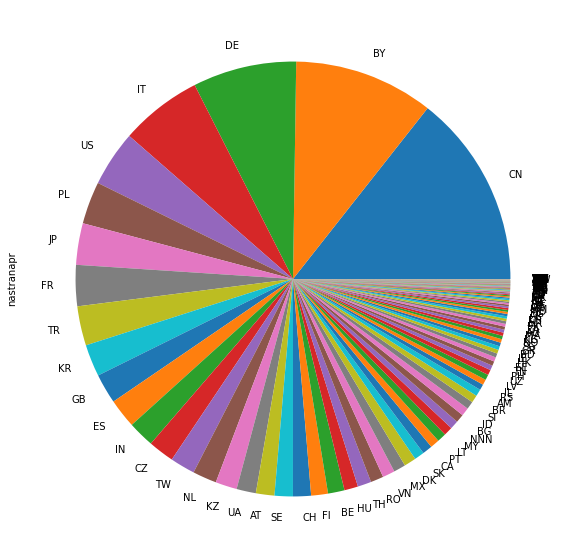

In [33]:
df.loc[df['napr'] == 'ИМ']['nastranapr'].value_counts().plot.pie(y='count', figsize=(10, 10))

<AxesSubplot:ylabel='nastranapr'>

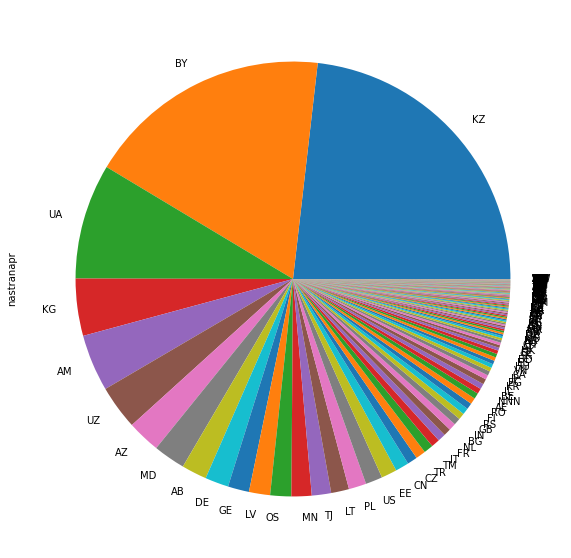

In [34]:
df.loc[df['napr'] == 'ЭК']['nastranapr'].value_counts().plot.pie(y='count', figsize=(10, 10))

### Выбросы

In [35]:
def calculate_outliers(data):
    q25 = data.quantile(0.25)
    q75 = data.quantile(0.75)
    iqr = q75 - q25
    boundaries = (q25 - 1.5 * iqr, q75 + 1.5 * iqr)
    
    return boundaries

#### Stoim

In [36]:
boundaries = calculate_outliers(df.Stoim)
boundaries

(-30616.954999999998, 51982.44499999999)

In [37]:
if df.Stoim.max() < boundaries[1]:
    print('максимум входит в границы')
else:
    print('максимум не входит в границы')
    
if df.Stoim.min() > boundaries[0]:
    print('минимум входит в границы')
else:
    print('минимум не входит в границы')
    
#Посчитаем и выведем количество выбросов
is_outlier = (df.Stoim < boundaries[0]) | (df.Stoim > boundaries[1]) 
print('количество выбросов -', is_outlier.sum())
#Посчитаем и выведем долю выбросов
print(is_outlier.sum() / len(df.Stoim))

максимум не входит в границы
минимум входит в границы
количество выбросов - 768726
0.1564665602966149


In [38]:
df[is_outlier]

,napr,period,nastranapr,tnved,Stoim,Netto,Kol,Region,Region_s
2,ЭК,04/2021,KZ,3808932700,73875.0000,8249.727,0.0,01000 - АЛТАЙСКИЙ КРАЙ,06-СИБИРСКИЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
17,ИМ,12/2021,TR,3907610000,129850.8000,88000.000,0.0,01000 - АЛТАЙСКИЙ КРАЙ,06-СИБИРСКИЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
31,ИМ,09/2021,CN,3304990000,97275.9500,7572.100,0.0,01000 - АЛТАЙСКИЙ КРАЙ,06-СИБИРСКИЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
49,ЭК,05/2021,KZ,3304990000,65448.7087,6245.705,0.0,01000 - АЛТАЙСКИЙ КРАЙ,06-СИБИРСКИЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
50,ЭК,06/2021,KZ,3304990000,91329.8653,8344.594,0.0,01000 - АЛТАЙСКИЙ КРАЙ,06-СИБИРСКИЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
...,...,...,...,...,...,...,...,...,...
4072338,ИМ,01/2021,NaN,806101000,156246.1700,89519.200,0.0,40000 - ГОРОД САНКТ-ПЕТЕРБУРГ ГОРОД ФЕДЕРАЛЬНО...,02-СЕВЕРО-ЗАПАДНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
4590434,ЭК,04/2021,NaN,3102309000,359792.6900,1800000.000,613200.0,70000 - ТУЛЬСКАЯ ОБЛАСТЬ,01-ЦЕНТРАЛЬНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
4590435,ЭК,09/2021,NaN,3102309000,271724.9700,1000000.000,340000.0,70000 - ТУЛЬСКАЯ ОБЛАСТЬ,01-ЦЕНТРАЛЬНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
4590436,ЭК,12/2021,NaN,3102309000,826677.4000,2498750.000,849575.0,70000 - ТУЛЬСКАЯ ОБЛАСТЬ,01-ЦЕНТРАЛЬНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ


In [39]:
df[df.Stoim < 0]

,napr,period,nastranapr,tnved,Stoim,Netto,Kol,Region,Region_s


In [40]:
print(df.Stoim.max())
print(df.Stoim.min())

2723443497.78
0.0


Text(0.5, 1.0, 'Ящик с усами для стоимости (с аномалиями)')

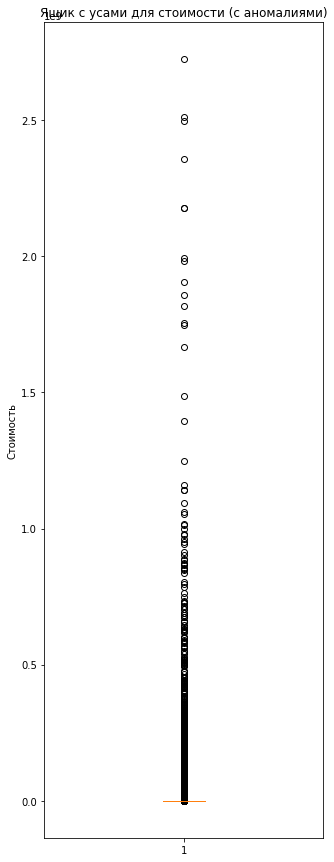

In [41]:
fig, ax = plt.subplots(figsize=(5, 15))
ax.boxplot(df.Stoim)
ax.set_ylabel('Стоимость')
ax.set_title('Ящик с усами для стоимости (с аномалиями)')


Провели исследование при помощи интерквантильного исследоввания данных, а также построили график показывающй большое кол-во объектом, стоимость которых не входит в нормальное распределение

### Netto

In [42]:
boundaries = calculate_outliers(df.Netto)
boundaries

(-4115.925, 6885.555)

In [43]:
print(df.Netto.max())
print(df.Netto.min())

4764780935.0
0.0


In [44]:
if df.Netto.max() < boundaries[1]:
    print('максимум входит в границы')
else:
    print('максимум не входит в границы')
    
if df.Netto.min() > boundaries[0]:
    print('минимум входит в границы')
else:
    print('минимум не входит в границы')
    
#Посчитаем и выведем количество выбросов
is_outlier = (df.Netto < boundaries[0]) | (df.Netto > boundaries[1]) 
print('количество выбросов -', is_outlier.sum())
#Посчитаем и выведем долю выбросов
print(is_outlier.sum() / len(df.Netto))

максимум не входит в границы
минимум входит в границы
количество выбросов - 918733
0.18699899878629042


Text(0.5, 1.0, 'Ящик с усами для стоимости (с аномалиями)')

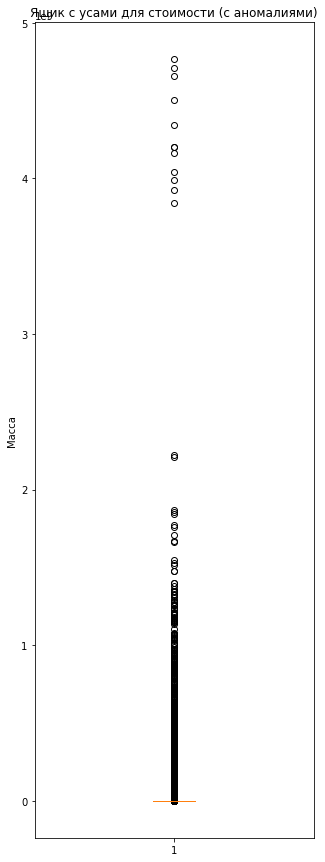

In [45]:
fig, ax = plt.subplots(figsize=(5, 15))
ax.boxplot(df.Netto)
ax.set_ylabel('Масса')
ax.set_title('Ящик с усами для стоимости (с аномалиями)')

Провели исследование при помощи интерквантильного исследоввания данных, а также построили график показывающй большое кол-во объектом, масса которых не входит в нормальное распределение

### Kol

In [46]:
boundaries = calculate_outliers(df.Kol)
boundaries

(-7.5, 12.5)

In [47]:
print(df.Kol.max())
print(df.Kol.min())

185445750000.0
0.0


In [48]:
if df.Kol.max() < boundaries[1]:
    print('максимум входит в границы')
else:
    print('максимум не входит в границы')
    
if df.Kol.min() > boundaries[0]:
    print('минимум входит в границы')
else:
    print('минимум не входит в границы')
    
#Посчитаем и выведем количество выбросов
is_outlier = (df.Kol < boundaries[0]) | (df.Kol > boundaries[1]) 
print('количество выбросов -', is_outlier.sum())
#Посчитаем и выведем долю выбросов
print(is_outlier.sum() / len(df.Kol))

максимум не входит в границы
минимум входит в границы
количество выбросов - 1056834
0.2151080889478341


Text(0.5, 1.0, 'Ящик с усами для стоимости (с аномалиями)')

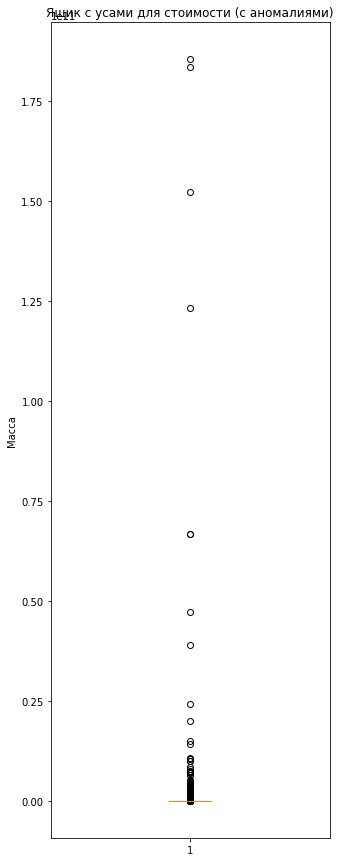

In [49]:
fig, ax = plt.subplots(figsize=(5, 15))
ax.boxplot(df.Kol)
ax.set_ylabel('Масса')
ax.set_title('Ящик с усами для стоимости (с аномалиями)')

Провели исследование при помощи интерквантильного исследоввания данных, а также построили график показывающй большое кол-во объектом, кол-во которых не входит в нормальное распределение

In [50]:
df[is_outlier].sort_values(by='Kol').tail(15)

,napr,period,nastranapr,tnved,Stoim,Netto,Kol,Region,Region_s
108178,ИМ,10/2021,ES,0106490009,1990.49,20.000,1.000002e+10,14000 - БЕЛГОРОДСКАЯ ОБЛАСТЬ,01-ЦЕНТРАЛЬНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
83105,ИМ,03/2021,UA,0106900090,335817.83,10152.450,1.050776e+10,14000 - БЕЛГОРОДСКАЯ ОБЛАСТЬ,01-ЦЕНТРАЛЬНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
1667323,ИМ,01/2021,BE,106490009,65826.56,865.000,1.081401e+10,45000 - ГОРОД МОСКВА СТОЛИЦА РОССИЙСКОЙ ФЕДЕРА...,01-ЦЕНТРАЛЬНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
2497398,ИМ,02/2021,NL,106900090,18908.83,200.800,1.420910e+10,46000 - МОСКОВСКАЯ ОБЛАСТЬ,01-ЦЕНТРАЛЬНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
68419,ИМ,06/2021,ES,0106490009,10229.17,56.000,1.500070e+10,14000 - БЕЛГОРОДСКАЯ ОБЛАСТЬ,01-ЦЕНТРАЛЬНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
83473,ИМ,11/2021,ES,0106490009,3850.56,50.000,2.000000e+10,14000 - БЕЛГОРОДСКАЯ ОБЛАСТЬ,01-ЦЕНТРАЛЬНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
68414,ИМ,08/2021,GB,0106900090,31953.36,1387.510,2.422620e+10,14000 - БЕЛГОРОДСКАЯ ОБЛАСТЬ,01-ЦЕНТРАЛЬНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
108014,ИМ,07/2021,GB,0106900090,36315.28,1444.110,3.893875e+10,14000 - БЕЛГОРОДСКАЯ ОБЛАСТЬ,01-ЦЕНТРАЛЬНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
2497400,ИМ,08/2021,NL,106900090,29645.71,196.396,4.719700e+10,46000 - МОСКОВСКАЯ ОБЛАСТЬ,01-ЦЕНТРАЛЬНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
1047765,ИМ,03/2021,BE,106490009,68486.52,427.000,6.677476e+10,45000 - ГОРОД МОСКВА СТОЛИЦА РОССИЙСКОЙ ФЕДЕРА...,01-ЦЕНТРАЛЬНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ


In [51]:
df[is_outlier].sort_values(by='Stoim').tail(15)

,napr,period,nastranapr,tnved,Stoim,Netto,Kol,Region,Region_s
704382,ЭК,04/2021,GB,7108120001,5.999548e+08,10774.462,10774460.2,34000 - КОСТРОМСКАЯ ОБЛАСТЬ,01-ЦЕНТРАЛЬНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
1373703,ЭК,04/2021,GB,7108120001,6.192148e+08,10966.151,10966148.5,45000 - ГОРОД МОСКВА СТОЛИЦА РОССИЙСКОЙ ФЕДЕРА...,01-ЦЕНТРАЛЬНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
714706,ЭК,10/2021,GB,7108120001,6.317942e+08,11120.046,11120045.2,34000 - КОСТРОМСКАЯ ОБЛАСТЬ,01-ЦЕНТРАЛЬНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
1772743,ЭК,09/2021,GB,7108120001,6.588994e+08,11465.906,11465905.4,45000 - ГОРОД МОСКВА СТОЛИЦА РОССИЙСКОЙ ФЕДЕРА...,01-ЦЕНТРАЛЬНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
708621,ЭК,06/2021,GB,7108120001,6.737871e+08,11358.518,11358516.3,34000 - КОСТРОМСКАЯ ОБЛАСТЬ,01-ЦЕНТРАЛЬНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
1941090,ЭК,07/2021,GB,7108120001,6.758748e+08,11672.747,11672744.8,45000 - ГОРОД МОСКВА СТОЛИЦА РОССИЙСКОЙ ФЕДЕРА...,01-ЦЕНТРАЛЬНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
1390495,ИМ,11/2021,CN,8517120000,6.817774e+08,1038290.849,2930658.0,45000 - ГОРОД МОСКВА СТОЛИЦА РОССИЙСКОЙ ФЕДЕРА...,01-ЦЕНТРАЛЬНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
713171,ЭК,07/2021,GB,7108120001,6.903352e+08,11944.995,11944995.2,34000 - КОСТРОМСКАЯ ОБЛАСТЬ,01-ЦЕНТРАЛЬНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
1090538,ЭК,06/2021,GB,7108120001,7.977482e+08,13264.832,13264831.8,45000 - ГОРОД МОСКВА СТОЛИЦА РОССИЙСКОЙ ФЕДЕРА...,01-ЦЕНТРАЛЬНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
1723314,ИМ,12/2021,CN,8517120000,9.019182e+08,1179454.204,3105806.0,45000 - ГОРОД МОСКВА СТОЛИЦА РОССИЙСКОЙ ФЕДЕРА...,01-ЦЕНТРАЛЬНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ


In [52]:
df[is_outlier].sort_values(by='Netto').tail(15)

,napr,period,nastranapr,tnved,Stoim,Netto,Kol,Region,Region_s
4864383,ЭК,04/2021,FR,2711110000,9.062346e+07,6.613130e+08,1.515643e+06,71140 - ЯМАЛО-НЕНЕЦКИЙ АВТОНОМНЫЙ ОКРУГ (ТЮМЕН...,05-УРАЛЬСКИЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
4864382,ЭК,08/2021,FR,2711110000,1.466894e+08,6.652430e+08,1.522195e+06,71140 - ЯМАЛО-НЕНЕЦКИЙ АВТОНОМНЫЙ ОКРУГ (ТЮМЕН...,05-УРАЛЬСКИЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
4155386,ИМ,12/2021,KZ,2711210000,0.000000e+00,6.853077e+08,7.959438e+08,40000 - ГОРОД САНКТ-ПЕТЕРБУРГ ГОРОД ФЕДЕРАЛЬНО...,02-СЕВЕРО-ЗАПАДНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
4156912,ИМ,05/2021,KZ,2711210000,0.000000e+00,6.903497e+08,7.935054e+08,40000 - ГОРОД САНКТ-ПЕТЕРБУРГ ГОРОД ФЕДЕРАЛЬНО...,02-СЕВЕРО-ЗАПАДНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
4156908,ИМ,03/2021,KZ,2711210000,0.000000e+00,7.010835e+08,8.123795e+08,40000 - ГОРОД САНКТ-ПЕТЕРБУРГ ГОРОД ФЕДЕРАЛЬНО...,02-СЕВЕРО-ЗАПАДНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
4156924,ИМ,11/2021,KZ,2711210000,0.000000e+00,7.025889e+08,8.150683e+08,40000 - ГОРОД САНКТ-ПЕТЕРБУРГ ГОРОД ФЕДЕРАЛЬНО...,02-СЕВЕРО-ЗАПАДНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
4156906,ИМ,02/2021,KZ,2711210000,0.000000e+00,7.171061e+08,8.290244e+08,40000 - ГОРОД САНКТ-ПЕТЕРБУРГ ГОРОД ФЕДЕРАЛЬНО...,02-СЕВЕРО-ЗАПАДНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
4156904,ИМ,01/2021,KZ,2711210000,0.000000e+00,8.009300e+08,9.280765e+08,40000 - ГОРОД САНКТ-ПЕТЕРБУРГ ГОРОД ФЕДЕРАЛЬНО...,02-СЕВЕРО-ЗАПАДНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
3018474,ЭК,09/2021,BR,3104205000,2.431091e+08,8.010268e+08,4.839038e+08,57000 - ПЕРМСКИЙ КРАЙ,04-ПРИВОЛЖСКИЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
4864386,ЭК,04/2021,CN,2711110000,1.467358e+08,8.033880e+08,1.841385e+06,71140 - ЯМАЛО-НЕНЕЦКИЙ АВТОНОМНЫЙ ОКРУГ (ТЮМЕН...,05-УРАЛЬСКИЙ ФЕДЕРАЛЬНЫЙ ОКРУГ


In [53]:
df.describe()

,Stoim,Netto,Kol
count,4.913037e+06,4.913037e+06,4.913037e+06
mean,1.599475e+05,2.125031e+05,2.781079e+05
std,5.622244e+06,1.041031e+07,1.575133e+08
min,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.578200e+02,9.630000e+00,0.000000e+00
50%,2.750700e+03,1.520000e+02,0.000000e+00
75%,2.100767e+04,2.760000e+03,5.000000e+00
max,2.723443e+09,4.764781e+09,1.854458e+11


In [54]:
df[df.Netto == 0.0].Stoim.max()

1857349836.76

In [55]:
df[df.Netto == 0.0]

,napr,period,nastranapr,tnved,Stoim,Netto,Kol,Region,Region_s
40203,ИМ,11/2021,MN,2716000000,28090.64,0.0,2.006470e+03,10000 - АМУРСКАЯ ОБЛАСТЬ,07-ДАЛЬНЕВОСТОЧНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
40204,ЭК,12/2021,MN,2716000000,3350185.85,0.0,4.198701e+04,10000 - АМУРСКАЯ ОБЛАСТЬ,07-ДАЛЬНЕВОСТОЧНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
40211,ЭК,04/2021,CN,2716000000,11810108.23,0.0,2.473360e+05,10000 - АМУРСКАЯ ОБЛАСТЬ,07-ДАЛЬНЕВОСТОЧНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
40212,ЭК,08/2021,CN,2716000000,19910331.33,0.0,4.207379e+05,10000 - АМУРСКАЯ ОБЛАСТЬ,07-ДАЛЬНЕВОСТОЧНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
40213,ЭК,10/2021,CN,2716000000,24844889.54,0.0,5.181466e+05,10000 - АМУРСКАЯ ОБЛАСТЬ,07-ДАЛЬНЕВОСТОЧНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
...,...,...,...,...,...,...,...,...,...
4156917,ЭК,07/2021,KZ,2711210000,0.00,0.0,5.514262e+08,40000 - ГОРОД САНКТ-ПЕТЕРБУРГ ГОРОД ФЕДЕРАЛЬНО...,02-СЕВЕРО-ЗАПАДНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
4156919,ЭК,08/2021,KZ,2711210000,0.00,0.0,4.471010e+08,40000 - ГОРОД САНКТ-ПЕТЕРБУРГ ГОРОД ФЕДЕРАЛЬНО...,02-СЕВЕРО-ЗАПАДНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
4156921,ЭК,09/2021,KZ,2711210000,0.00,0.0,2.033950e+08,40000 - ГОРОД САНКТ-ПЕТЕРБУРГ ГОРОД ФЕДЕРАЛЬНО...,02-СЕВЕРО-ЗАПАДНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
4156923,ЭК,10/2021,KZ,2711210000,0.00,0.0,3.289307e+08,40000 - ГОРОД САНКТ-ПЕТЕРБУРГ ГОРОД ФЕДЕРАЛЬНО...,02-СЕВЕРО-ЗАПАДНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ


In [56]:
df[df.Netto == 0.0].describe()

,Stoim,Netto,Kol
count,7.490000e+02,749.0,7.490000e+02
mean,1.517939e+07,0.0,2.729715e+08
std,7.828047e+07,0.0,6.605713e+08
min,0.000000e+00,0.0,0.000000e+00
25%,0.000000e+00,0.0,9.440000e+00
50%,1.505000e+02,0.0,4.207379e+05
75%,2.634686e+06,0.0,2.254161e+08
max,1.857350e+09,0.0,4.898462e+09


In [57]:
print('Stoim = 0:', df[df.Stoim == 0.0].Stoim.count())
print('Netto = 0:', df[df.Netto == 0.0].Netto.count())
print('Kol = 0:', df[df.Kol == 0.0].Kol.count())

Stoim = 0: 430
Netto = 0: 749
Kol = 0: 3259847


Большие значения массы совпадают с большими значениями стоимости и количества - выделить в отдельный кластер!

0.0 в колонке Stoim, Netto - удалить (скорее всего незаполненные данные)

0.0 в колонке Kol - надо подумать

### Исследуем отдельно нули в каждой колонке

In [58]:
df[df.Stoim == 0.]     

,napr,period,nastranapr,tnved,Stoim,Netto,Kol,Region,Region_s
99064,ЭК,09/2021,UA,0402993100,0.0,80.64,0.0,14000 - БЕЛГОРОДСКАЯ ОБЛАСТЬ,01-ЦЕНТРАЛЬНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
102107,ЭК,08/2021,UA,4911101009,0.0,5.30,0.0,14000 - БЕЛГОРОДСКАЯ ОБЛАСТЬ,01-ЦЕНТРАЛЬНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
107504,ЭК,10/2021,UA,1703900000,0.0,392060.00,0.0,14000 - БЕЛГОРОДСКАЯ ОБЛАСТЬ,01-ЦЕНТРАЛЬНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
284294,ЭК,11/2021,BG,8421220000,0.0,2.00,1.0,20000 - ВОРОНЕЖСКАЯ ОБЛАСТЬ,01-ЦЕНТРАЛЬНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
288336,ЭК,11/2021,BG,3926909709,0.0,115.20,0.0,20000 - ВОРОНЕЖСКАЯ ОБЛАСТЬ,01-ЦЕНТРАЛЬНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
...,...,...,...,...,...,...,...,...,...
4156925,ЭК,11/2021,KZ,2711210000,0.0,0.00,697989191.0,40000 - ГОРОД САНКТ-ПЕТЕРБУРГ ГОРОД ФЕДЕРАЛЬНО...,02-СЕВЕРО-ЗАПАДНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
4388858,ЭК,08/2021,TJ,4911101009,0.0,194.00,0.0,66000 - СМОЛЕНСКАЯ ОБЛАСТЬ,01-ЦЕНТРАЛЬНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
4391143,ЭК,08/2021,TJ,4911109000,0.0,17.30,0.0,66000 - СМОЛЕНСКАЯ ОБЛАСТЬ,01-ЦЕНТРАЛЬНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
4415633,ЭК,02/2021,PK,1001990000,0.0,15313090.00,0.0,66000 - СМОЛЕНСКАЯ ОБЛАСТЬ,01-ЦЕНТРАЛЬНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ


Эти значния не имеют для нас статистической значимости, удалим их

In [59]:
netto_0 = df[df.Netto == 0.]
netto_0_im = netto_0[netto_0.napr == 'ИМ']

In [60]:
netto_0[netto_0.Stoim > 1000000]

,napr,period,nastranapr,tnved,Stoim,Netto,Kol,Region,Region_s
40204,ЭК,12/2021,MN,2716000000,3350185.85,0.0,41987.01,10000 - АМУРСКАЯ ОБЛАСТЬ,07-ДАЛЬНЕВОСТОЧНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
40211,ЭК,04/2021,CN,2716000000,11810108.23,0.0,247336.01,10000 - АМУРСКАЯ ОБЛАСТЬ,07-ДАЛЬНЕВОСТОЧНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
40212,ЭК,08/2021,CN,2716000000,19910331.33,0.0,420737.86,10000 - АМУРСКАЯ ОБЛАСТЬ,07-ДАЛЬНЕВОСТОЧНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
40213,ЭК,10/2021,CN,2716000000,24844889.54,0.0,518146.63,10000 - АМУРСКАЯ ОБЛАСТЬ,07-ДАЛЬНЕВОСТОЧНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
40215,ЭК,02/2021,MN,2716000000,1989142.72,0.0,24539.41,10000 - АМУРСКАЯ ОБЛАСТЬ,07-ДАЛЬНЕВОСТОЧНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
...,...,...,...,...,...,...,...,...,...
4155514,ИМ,06/2021,KZ,XXXXXXXXXX,11792902.27,0.0,0.00,40000 - ГОРОД САНКТ-ПЕТЕРБУРГ ГОРОД ФЕДЕРАЛЬНО...,02-СЕВЕРО-ЗАПАДНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
4155515,ИМ,07/2021,KZ,XXXXXXXXXX,11628412.73,0.0,0.00,40000 - ГОРОД САНКТ-ПЕТЕРБУРГ ГОРОД ФЕДЕРАЛЬНО...,02-СЕВЕРО-ЗАПАДНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
4155694,ИМ,11/2021,KZ,XXXXXXXXXX,15934585.11,0.0,0.00,40000 - ГОРОД САНКТ-ПЕТЕРБУРГ ГОРОД ФЕДЕРАЛЬНО...,02-СЕВЕРО-ЗАПАДНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
4155752,ИМ,03/2021,KZ,XXXXXXXXXX,11527665.77,0.0,0.00,40000 - ГОРОД САНКТ-ПЕТЕРБУРГ ГОРОД ФЕДЕРАЛЬНО...,02-СЕВЕРО-ЗАПАДНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ


In [61]:
netto_0_im[netto_0_im.Stoim > 100000] # оставляем!

,napr,period,nastranapr,tnved,Stoim,Netto,Kol,Region,Region_s
1049031,ИМ,01/2021,AZ,2716000000,2.953705e+05,0.0,7158.35,45000 - ГОРОД МОСКВА СТОЛИЦА РОССИЙСКОЙ ФЕДЕРА...,01-ЦЕНТРАЛЬНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
1049033,ИМ,05/2021,AZ,2716000000,3.342710e+05,0.0,8221.70,45000 - ГОРОД МОСКВА СТОЛИЦА РОССИЙСКОЙ ФЕДЕРА...,01-ЦЕНТРАЛЬНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
1049034,ИМ,06/2021,AZ,2716000000,3.340340e+05,0.0,8339.43,45000 - ГОРОД МОСКВА СТОЛИЦА РОССИЙСКОЙ ФЕДЕРА...,01-ЦЕНТРАЛЬНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
1170825,ИМ,04/2021,AZ,2716000000,3.432686e+05,0.0,8257.42,45000 - ГОРОД МОСКВА СТОЛИЦА РОССИЙСКОЙ ФЕДЕРА...,01-ЦЕНТРАЛЬНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
1342586,ИМ,02/2021,AZ,2716000000,3.051490e+05,0.0,7519.28,45000 - ГОРОД МОСКВА СТОЛИЦА РОССИЙСКОЙ ФЕДЕРА...,01-ЦЕНТРАЛЬНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
1342588,ИМ,10/2021,AZ,2716000000,2.940831e+05,0.0,7653.54,45000 - ГОРОД МОСКВА СТОЛИЦА РОССИЙСКОЙ ФЕДЕРА...,01-ЦЕНТРАЛЬНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
1497119,ИМ,03/2021,AZ,2716000000,3.361135e+05,0.0,8263.55,45000 - ГОРОД МОСКВА СТОЛИЦА РОССИЙСКОЙ ФЕДЕРА...,01-ЦЕНТРАЛЬНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
1497121,ИМ,09/2021,AZ,2716000000,3.007389e+05,0.0,7638.89,45000 - ГОРОД МОСКВА СТОЛИЦА РОССИЙСКОЙ ФЕДЕРА...,01-ЦЕНТРАЛЬНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
1689004,ИМ,07/2021,AZ,2716000000,3.317834e+05,0.0,8278.89,45000 - ГОРОД МОСКВА СТОЛИЦА РОССИЙСКОЙ ФЕДЕРА...,01-ЦЕНТРАЛЬНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
1816581,ИМ,12/2021,AZ,2716000000,3.208288e+05,0.0,8285.75,45000 - ГОРОД МОСКВА СТОЛИЦА РОССИЙСКОЙ ФЕДЕРА...,01-ЦЕНТРАЛЬНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ


Оставим в выборке объекты импорта с значениями с нулевой массой, но большой стоимостью, остальные нулевые значения массы удалим

In [62]:
df[df.Kol == 0.] 

,napr,period,nastranapr,tnved,Stoim,Netto,Kol,Region,Region_s
0,ИМ,05/2021,IN,3507909000,3414.01,50.000,0.0,01000 - АЛТАЙСКИЙ КРАЙ,06-СИБИРСКИЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
1,ЭК,02/2021,KZ,3808911000,4020.47,741.809,0.0,01000 - АЛТАЙСКИЙ КРАЙ,06-СИБИРСКИЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
2,ЭК,04/2021,KZ,3808932700,73875.00,8249.727,0.0,01000 - АЛТАЙСКИЙ КРАЙ,06-СИБИРСКИЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
3,ЭК,09/2021,KZ,3808932700,14184.26,2023.609,0.0,01000 - АЛТАЙСКИЙ КРАЙ,06-СИБИРСКИЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
4,ЭК,12/2021,KZ,3808932700,92.32,3.545,0.0,01000 - АЛТАЙСКИЙ КРАЙ,06-СИБИРСКИЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
...,...,...,...,...,...,...,...,...,...
1555551,ИМ,12/2021,NaN,307119000,109973.25,7578.000,0.0,45000 - ГОРОД МОСКВА СТОЛИЦА РОССИЙСКОЙ ФЕДЕРА...,01-ЦЕНТРАЛЬНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
3847941,ИМ,02/2021,NaN,806101000,123140.50,71539.500,0.0,40000 - ГОРОД САНКТ-ПЕТЕРБУРГ ГОРОД ФЕДЕРАЛЬНО...,02-СЕВЕРО-ЗАПАДНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
3992931,ИМ,12/2021,NaN,806101000,130823.74,73677.000,0.0,40000 - ГОРОД САНКТ-ПЕТЕРБУРГ ГОРОД ФЕДЕРАЛЬНО...,02-СЕВЕРО-ЗАПАДНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
4065653,ЭК,12/2021,NaN,4911990000,1340887.24,5760.000,0.0,40000 - ГОРОД САНКТ-ПЕТЕРБУРГ ГОРОД ФЕДЕРАЛЬНО...,02-СЕВЕРО-ЗАПАДНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ


Слишком большое кол-во 0 (незаполненные данных). Их нельзя восстановить или удалить полностью. Не будем рассматривать эту колонку

Удаление статистически незначимых данных

In [63]:
df = df[df.Stoim != 0.] 

In [64]:
df = df[df.Netto != 0.]
df = pd.concat([df, netto_0_im[netto_0_im.Stoim > 100000]])

In [65]:
df = df.drop('Kol', axis=1)

In [66]:
df.shape

(4912246, 8)

## Исследование зависимостей

<AxesSubplot:ylabel='nastranapr'>

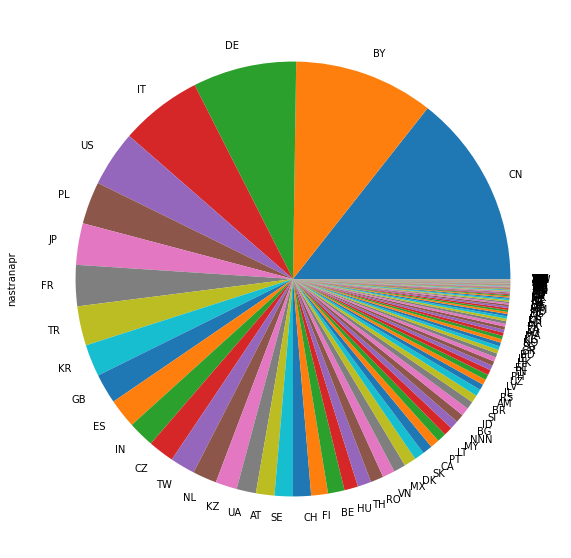

In [67]:
df.loc[df['napr'] == 'ИМ']['nastranapr'].value_counts().plot.pie(y='count', figsize=(10, 10))

<AxesSubplot:ylabel='tnved'>

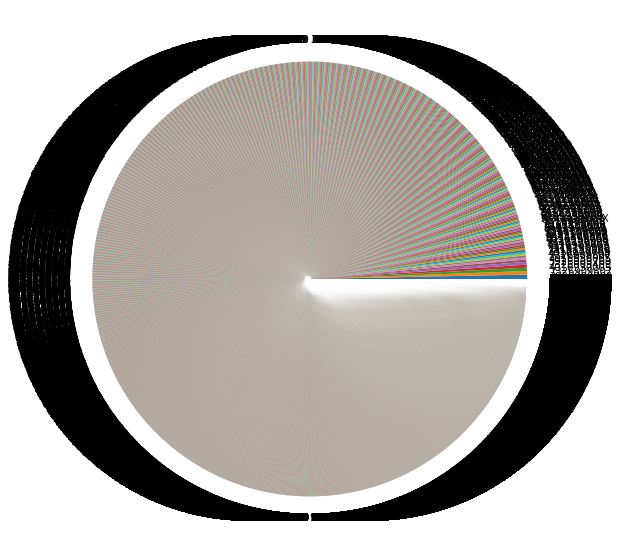

In [68]:
df.loc[df['napr'] == 'ИМ']['tnved'].value_counts().plot.pie(y='count', figsize=(10, 10))

In [69]:
df.head(3)

,napr,period,nastranapr,tnved,Stoim,Netto,Region,Region_s
0,ИМ,05/2021,IN,3507909000,3414.01,50.000,01000 - АЛТАЙСКИЙ КРАЙ,06-СИБИРСКИЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
1,ЭК,02/2021,KZ,3808911000,4020.47,741.809,01000 - АЛТАЙСКИЙ КРАЙ,06-СИБИРСКИЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
2,ЭК,04/2021,KZ,3808932700,73875.00,8249.727,01000 - АЛТАЙСКИЙ КРАЙ,06-СИБИРСКИЙ ФЕДЕРАЛЬНЫЙ ОКРУГ


In [70]:
stats_napr_Stoim = df.groupby(['napr'], as_index=False)[['Stoim']].sum()
print(stats_napr_Stoim)
print('///////////////////')

stats_napr_Netto = df.groupby(['napr'], as_index=False)[['Netto']].sum()
print(stats_napr_Netto)
print('///////////////////')


  napr         Stoim
0   ИМ  2.935007e+11
1   ЭК  4.810651e+11
///////////////////
  napr         Netto
0   ИМ  1.237541e+11
1   ЭК  9.131695e+11
///////////////////


In [71]:
df_im = df[df.napr == 'ИМ']
df_im.head(4)

,napr,period,nastranapr,tnved,Stoim,Netto,Region,Region_s
0,ИМ,05/2021,IN,3507909000,3414.01,50.0,01000 - АЛТАЙСКИЙ КРАЙ,06-СИБИРСКИЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
10,ИМ,06/2021,KZ,3506100000,91.81,16.1,01000 - АЛТАЙСКИЙ КРАЙ,06-СИБИРСКИЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
11,ИМ,07/2021,KZ,3506100000,15.65,2.3,01000 - АЛТАЙСКИЙ КРАЙ,06-СИБИРСКИЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
12,ИМ,08/2021,KZ,3506100000,72.38,11.5,01000 - АЛТАЙСКИЙ КРАЙ,06-СИБИРСКИЙ ФЕДЕРАЛЬНЫЙ ОКРУГ


In [72]:
stats_period_Stoim = df_im.groupby(['period'], as_index=False)[['Stoim']].sum()
print(stats_period_Stoim)
print('////////////////////////////')

stats_period_Netto = df_im.groupby(['period'], as_index=False)[['Netto']].sum()
print(stats_period_Netto)
print('////////////////////////////')

     period         Stoim
0   01/2021  1.683400e+10
1   02/2021  2.058029e+10
2   03/2021  2.497581e+10
3   04/2021  2.531268e+10
4   05/2021  2.391065e+10
5   06/2021  2.483611e+10
6   07/2021  2.542822e+10
7   08/2021  2.512227e+10
8   09/2021  2.458956e+10
9   10/2021  2.561302e+10
10  11/2021  2.682958e+10
11  12/2021  2.946846e+10
////////////////////////////
     period         Netto
0   01/2021  8.227812e+09
1   02/2021  8.107315e+09
2   03/2021  1.044103e+10
3   04/2021  1.088377e+10
4   05/2021  1.086643e+10
5   06/2021  1.126513e+10
6   07/2021  1.081307e+10
7   08/2021  1.062652e+10
8   09/2021  1.044692e+10
9   10/2021  1.049462e+10
10  11/2021  1.074385e+10
11  12/2021  1.083767e+10
////////////////////////////


Text(0.5, 0, 'период')

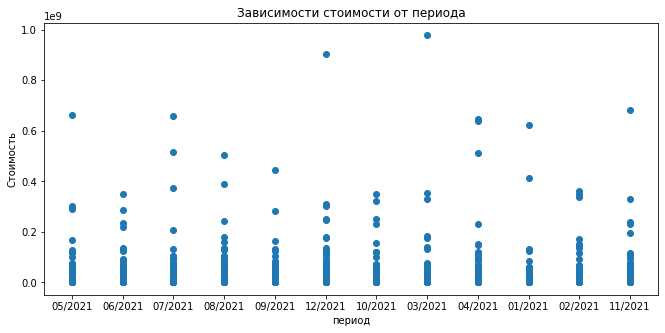

In [73]:
plt.figure(figsize=(11, 5))
plt.scatter(df_im['period'], df_im['Stoim'],)
plt.title('Зависимости стоимости от периода')
plt.ylabel('Стоимость')
plt.xlabel('период')

Text(0.5, 0, 'период')

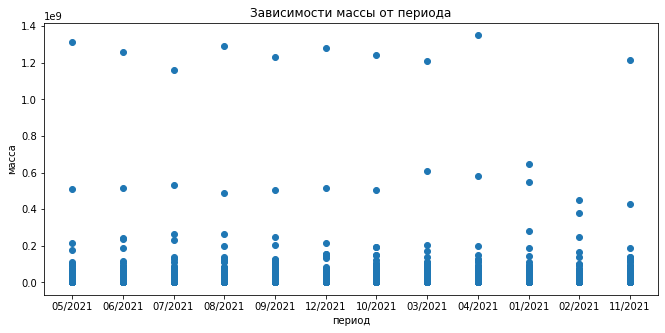

In [74]:
plt.figure(figsize=(11, 5))
plt.scatter(df_im['period'], df_im['Netto'],)
plt.title('Зависимости массы от периода')
plt.ylabel('масса')
plt.xlabel('период')

In [75]:
stats_nastranapr_Stoim = df_im.groupby(['nastranapr'], as_index=False)[['Stoim']].sum()
print(stats_nastranapr_Stoim)
print('////////////////////////////')

stats_nastranapr_Netto = df_im.groupby(['nastranapr'], as_index=False)[['Netto']].sum()
print(stats_nastranapr_Netto)
print('////////////////////////////')


    nastranapr         Stoim
0           AB  7.023239e+07
1           AD  4.976562e+04
2           AE  2.763072e+08
3           AF  4.722184e+06
4           AG  1.918170e+03
..         ...           ...
231         WF  1.185190e+03
232         YE  1.573317e+05
233         ZA  7.968769e+08
234         ZM  1.575014e+07
235         ZW  3.484610e+07

[236 rows x 2 columns]
////////////////////////////
    nastranapr         Netto
0           AB  6.722306e+07
1           AD  6.096535e+02
2           AE  6.972772e+07
3           AF  3.627590e+06
4           AG  8.372000e+01
..         ...           ...
231         WF  5.653255e+00
232         YE  2.161264e+04
233         ZA  1.316557e+09
234         ZM  5.104551e+06
235         ZW  9.454271e+06

[236 rows x 2 columns]
////////////////////////////


In [76]:
df_im.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2920061 entries, 0 to 4156140
Data columns (total 8 columns):
 #   Column      Dtype  
---  ------      -----  
 0   napr        object 
 1   period      object 
 2   nastranapr  object 
 3   tnved       object 
 4   Stoim       float64
 5   Netto       float64
 6   Region      object 
 7   Region_s    object 
dtypes: float64(2), object(6)
memory usage: 200.5+ MB


In [77]:
df_im[type(df_im['nastranapr']) == float]

KeyError: False

In [ ]:
plt.figure(figsize=(55, 7))
plt.scatter(df['nastranapr'], df['Stoim'],)
plt.title('Зависимости стоимости от nastranapr')
plt.ylabel('Стоимость')
plt.xlabel('nastranapr')

In [ ]:
plt.figure(figsize=(55, 7))
plt.scatter(df_im['nastranapr'], df_im['Netto'],)
plt.title('Зависимости массы от nastranapr')
plt.ylabel('масса')
plt.xlabel('nastranapr')

## Подготовка датасета для фронта

In [79]:
df

,napr,period,nastranapr,tnved,Stoim,Netto,Region,Region_s
0,ИМ,05/2021,IN,3507909000,3414.01,50.000,01000 - АЛТАЙСКИЙ КРАЙ,06-СИБИРСКИЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
1,ЭК,02/2021,KZ,3808911000,4020.47,741.809,01000 - АЛТАЙСКИЙ КРАЙ,06-СИБИРСКИЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
2,ЭК,04/2021,KZ,3808932700,73875.00,8249.727,01000 - АЛТАЙСКИЙ КРАЙ,06-СИБИРСКИЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
3,ЭК,09/2021,KZ,3808932700,14184.26,2023.609,01000 - АЛТАЙСКИЙ КРАЙ,06-СИБИРСКИЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
4,ЭК,12/2021,KZ,3808932700,92.32,3.545,01000 - АЛТАЙСКИЙ КРАЙ,06-СИБИРСКИЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
...,...,...,...,...,...,...,...,...
4155514,ИМ,06/2021,KZ,XXXXXXXXXX,11792902.27,0.000,40000 - ГОРОД САНКТ-ПЕТЕРБУРГ ГОРОД ФЕДЕРАЛЬНО...,02-СЕВЕРО-ЗАПАДНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
4155515,ИМ,07/2021,KZ,XXXXXXXXXX,11628412.73,0.000,40000 - ГОРОД САНКТ-ПЕТЕРБУРГ ГОРОД ФЕДЕРАЛЬНО...,02-СЕВЕРО-ЗАПАДНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
4155694,ИМ,11/2021,KZ,XXXXXXXXXX,15934585.11,0.000,40000 - ГОРОД САНКТ-ПЕТЕРБУРГ ГОРОД ФЕДЕРАЛЬНО...,02-СЕВЕРО-ЗАПАДНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
4155752,ИМ,03/2021,KZ,XXXXXXXXXX,11527665.77,0.000,40000 - ГОРОД САНКТ-ПЕТЕРБУРГ ГОРОД ФЕДЕРАЛЬНО...,02-СЕВЕРО-ЗАПАДНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ


In [82]:
df = df.drop(['Netto','Region_s'], axis=1)
df

,napr,period,nastranapr,tnved,Stoim,Region
0,ИМ,05/2021,IN,3507909000,3414.01,01000 - АЛТАЙСКИЙ КРАЙ
1,ЭК,02/2021,KZ,3808911000,4020.47,01000 - АЛТАЙСКИЙ КРАЙ
2,ЭК,04/2021,KZ,3808932700,73875.00,01000 - АЛТАЙСКИЙ КРАЙ
3,ЭК,09/2021,KZ,3808932700,14184.26,01000 - АЛТАЙСКИЙ КРАЙ
4,ЭК,12/2021,KZ,3808932700,92.32,01000 - АЛТАЙСКИЙ КРАЙ
...,...,...,...,...,...,...
4155514,ИМ,06/2021,KZ,XXXXXXXXXX,11792902.27,40000 - ГОРОД САНКТ-ПЕТЕРБУРГ ГОРОД ФЕДЕРАЛЬНО...
4155515,ИМ,07/2021,KZ,XXXXXXXXXX,11628412.73,40000 - ГОРОД САНКТ-ПЕТЕРБУРГ ГОРОД ФЕДЕРАЛЬНО...
4155694,ИМ,11/2021,KZ,XXXXXXXXXX,15934585.11,40000 - ГОРОД САНКТ-ПЕТЕРБУРГ ГОРОД ФЕДЕРАЛЬНО...
4155752,ИМ,03/2021,KZ,XXXXXXXXXX,11527665.77,40000 - ГОРОД САНКТ-ПЕТЕРБУРГ ГОРОД ФЕДЕРАЛЬНО...


## Выбор периода

In [86]:
df['period'].unique()

array(['05/2021', '02/2021', '04/2021', '09/2021', '12/2021', '07/2021',
       '06/2021', '08/2021', '11/2021', '03/2021', '10/2021', '01/2021'],
      dtype=object)

In [87]:
df[(df['period'] == '12/2021') | (df['period'] == '11/2021')]
#ствим любой фильтр таким образом


,napr,period,nastranapr,tnved,Stoim,Region
4,ЭК,12/2021,KZ,3808932700,92.32,01000 - АЛТАЙСКИЙ КРАЙ
7,ЭК,12/2021,KZ,3808914000,27.77,01000 - АЛТАЙСКИЙ КРАЙ
14,ЭК,11/2021,KZ,3808942000,1118.07,01000 - АЛТАЙСКИЙ КРАЙ
17,ИМ,12/2021,TR,3907610000,129850.80,01000 - АЛТАЙСКИЙ КРАЙ
21,ЭК,11/2021,KG,3304910000,2.24,01000 - АЛТАЙСКИЙ КРАЙ
...,...,...,...,...,...,...
4065653,ЭК,12/2021,NaN,4911990000,1340887.24,40000 - ГОРОД САНКТ-ПЕТЕРБУРГ ГОРОД ФЕДЕРАЛЬНО...
4590436,ЭК,12/2021,NaN,3102309000,826677.40,70000 - ТУЛЬСКАЯ ОБЛАСТЬ
1816581,ИМ,12/2021,AZ,2716000000,320828.78,45000 - ГОРОД МОСКВА СТОЛИЦА РОССИЙСКОЙ ФЕДЕРА...
2005627,ИМ,11/2021,AZ,2716000000,303199.02,45000 - ГОРОД МОСКВА СТОЛИЦА РОССИЙСКОЙ ФЕДЕРА...


## Добавляем разныйй уровень

In [88]:
df['2-level-tnved'] = df['tnved'].str.slice(start=0, stop=2)
df['4-level-tnved'] = df['tnved'].str.slice(start=0, stop=4)
df['6-level-tnved'] = df['tnved'].str.slice(start=0, stop=6)
df['8-level-tnved'] = df['tnved'].str.slice(start=0, stop=8)

In [89]:
df_exp = df[df['napr'] == 'ЭК']
df_imp = df[df['napr'] == 'ИМ']
df_exp.groupby(['tnved', 'nastranapr', 'Region']).agg({'Stoim': 'sum'})
df_imp.groupby(['tnved', 'nastranapr', 'Region']).agg({'Stoim': 'sum'})
df.groupby(['tnved', 'napr', 'nastranapr', 'Region']).agg({'Stoim': 'sum'})
#ниша+страна ниша

Stoim
tnved      napr nastranapr Region                                                       
101210000  ИМ   DE         27000 - КАЛИНИНГРАДСКАЯ ОБЛАСТЬ                      14593.18
                EE         45000 - ГОРОД МОСКВА СТОЛИЦА РОССИЙСКОЙ ФЕДЕРАЦ...    2456.69
                FR         45000 - ГОРОД МОСКВА СТОЛИЦА РОССИЙСКОЙ ФЕДЕРАЦ...  258266.73
                IT         45000 - ГОРОД МОСКВА СТОЛИЦА РОССИЙСКОЙ ФЕДЕРАЦ...    6580.58
                LV         45000 - ГОРОД МОСКВА СТОЛИЦА РОССИЙСКОЙ ФЕДЕРАЦ...    2425.22
...                                                                                  ...
XXXXXXXXXX ЭК   ZA         75000 - ЧЕЛЯБИНСКАЯ ОБЛАСТЬ                         127545.00
                           92000 - РЕСПУБЛИКА ТАТАРСТАН (ТАТАРСТАН)             24330.24
                           94000 - УДМУРТСКАЯ РЕСПУБЛИКА                         2336.51
                ZM         94000 - УДМУРТСКАЯ РЕСПУБЛИКА                        23568.01
                ZW         01000 - АЛТАЙСКИЙ КРАЙ                              131810.00

[1418521 rows x 1 columns]

In [96]:
df['period'].unique()

array(['05/2021', '02/2021', '04/2021', '09/2021', '12/2021', '07/2021',
       '06/2021', '08/2021', '11/2021', '03/2021', '10/2021', '01/2021'],
      dtype=object)

In [93]:
df_imp.groupby(['tnved', 'Region', 'nastranapr']).agg({'Stoim': 'sum'})
df_exp.groupby(['tnved', 'Region', 'nastranapr']).agg({'Stoim': 'sum'})
df.groupby(['tnved', 'napr', 'Region', 'nastranapr']).agg({'Stoim': 'sum'})

Stoim
tnved      napr Region                                             nastranapr             
101210000  ИМ   27000 - КАЛИНИНГРАДСКАЯ ОБЛАСТЬ                    DE             14593.18
                45000 - ГОРОД МОСКВА СТОЛИЦА РОССИЙСКОЙ ФЕДЕРАЦ... EE              2456.69
                                                                   FR            258266.73
                                                                   IT              6580.58
                                                                   LV              2425.22
...                                                                                    ...
XXXXXXXXXX ЭК   98000 - РЕСПУБЛИКА САХА (ЯКУТИЯ)                   FR             64103.70
                                                                   MN          32433123.45
                                                                   NL              2500.00
                                                                   TR             15000.00
                                                                   US             10000.00

[1418521 rows x 1 columns]

In [96]:
df_imp.groupby(['tnved', 'Region']).agg({'Stoim': 'sum'})
df_exp.groupby(['tnved', 'Region']).agg({'Stoim': 'sum'})
df.groupby(['tnved', 'napr', 'Region']).agg({'Stoim': 'sum'})

Stoim
tnved      napr Region                                                          
101210000  ИМ   27000 - КАЛИНИНГРАДСКАЯ ОБЛАСТЬ                     1.459318e+04
                45000 - ГОРОД МОСКВА СТОЛИЦА РОССИЙСКОЙ ФЕДЕРАЦ...  1.294981e+06
                46000 - МОСКОВСКАЯ ОБЛАСТЬ                          8.610856e+05
           ЭК   40000 - ГОРОД САНКТ-ПЕТЕРБУРГ ГОРОД ФЕДЕРАЛЬНОГ...  2.648813e+04
                45000 - ГОРОД МОСКВА СТОЛИЦА РОССИЙСКОЙ ФЕДЕРАЦ...  3.339632e+04
...                                                                          ...
XXXXXXXXXX ЭК   92000 - РЕСПУБЛИКА ТАТАРСТАН (ТАТАРСТАН)            3.081833e+08
                94000 - УДМУРТСКАЯ РЕСПУБЛИКА                       2.149727e+08
                96000 - ЧЕЧЕНСКАЯ РЕСПУБЛИКА                        2.848860e+04
                97000 - ЧУВАШСКАЯ РЕСПУБЛИКА - ЧУВАШИЯ              3.131536e+06
                98000 - РЕСПУБЛИКА САХА (ЯКУТИЯ)                    3.271579e+07

[408292 rows x 1 columns]

In [97]:
df_exp.groupby(['tnved', 'nastranapr']).agg({'Stoim': 'sum'})
df_imp.groupby(['tnved', 'nastranapr']).agg({'Stoim': 'sum'})
df.groupby(['tnved', 'napr', 'nastranapr']).agg({'Stoim': 'sum'})

Stoim
tnved      napr nastranapr              
101210000  ИМ   DE          1.459318e+04
                EE          2.456690e+03
                FR          2.582667e+05
                IT          6.580580e+03
                LV          2.425220e+03
...                                  ...
XXXXXXXXXX ЭК   VN          3.036928e+08
                YE          5.990000e+02
                ZA          9.568319e+05
                ZM          2.356801e+04
                ZW          1.318100e+05

[468402 rows x 1 columns]

In [104]:
#тут считаем разницу импорта и экспорта
df_imp.groupby(['tnved']).agg({'Stoim': 'sum'}).sub(df_exp.groupby(['tnved']).agg({'Stoim': 'sum'}), fill_value=0)

,Stoim
tnved,
101210000,1.867566e+06
101291000,-3.608757e+04
101299000,1.516130e+06
101300000,2.670165e+04
102211000,5.339633e+07
...,...
9703000000,-1.185370e+03
9704000000,2.856300e+02
9705000000,-3.070525e+04


In [98]:
df_imp.groupby(['Region']).sum()
df_exp.groupby(['Region']).sum()
df.groupby(['Region']).sum()

,Stoim
Region,
01000 - АЛТАЙСКИЙ КРАЙ,1.828853e+09
03000 - КРАСНОДАРСКИЙ КРАЙ,1.320237e+10
04000 - КРАСНОЯРСКИЙ КРАЙ,9.869236e+09
05000 - ПРИМОРСКИЙ КРАЙ,1.065281e+10
07000 - СТАВРОПОЛЬСКИЙ КРАЙ,2.248922e+09
...,...
95000 - РЕСПУБЛИКА ХАКАСИЯ,3.103238e+09
96000 - ЧЕЧЕНСКАЯ РЕСПУБЛИКА,7.224678e+07
97000 - ЧУВАШСКАЯ РЕСПУБЛИКА - ЧУВАШИЯ,6.235843e+08


In [101]:
df_imp.groupby(['tnved']).sum()
df_exp.groupby(['tnved']).sum()
df.groupby(['tnved']).sum()

,Stoim
tnved,
101210000,2.473753e+06
101291000,3.608757e+04
101299000,3.775849e+06
101300000,2.670165e+04
102211000,5.412253e+07
...,...
9703000000,2.318525e+05
9704000000,2.018310e+03
9705000000,1.557601e+06


In [100]:
df_imp.groupby(['nastranapr']).sum()
df_exp.groupby(['nastranapr']).sum()
df.groupby(['nastranapr']).sum()

,Stoim
nastranapr,
AB,3.471200e+08
AD,1.352821e+07
AE,5.357906e+09
AF,8.665600e+07
AG,3.121508e+04
...,...
WS,1.316029e+04
YE,2.345404e+08
ZA,1.139099e+09


диаграммы для ниш (название ниши / стоимость (масса))
разделить графики на экспорт и импорт
посмотреть пропуски и нули:
 - 
 -
 -
хороший ноутбук ()